## Student Performance Indicator


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### Complete steps of this project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r"C:\Users\Black\Downloads\power bi\e-drive\ANL-FOR-EDA\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values

In [11]:
df.duplicated().sum()

np.int64(0)

there are no duplicate vaiues

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of data set

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
import pandas as pd

categories_table = pd.DataFrame({
    "Variable": [
        "gender",
        "race_ethnicity",
        "parental_level_of_education",
        "lunch",
        "test_preparation_course"
    ],
    "Categories": [
        df["gender"].unique(),
        df["race_ethnicity"].unique(),
        df["parental_level_of_education"].unique(),
        df["lunch"].unique(),
        df["test_preparation_course"].unique()
    ]
})

categories_table


,Variable,Categories
0,gender,"[female, male]"
1,race_ethnicity,"[group B, group C, group A, group D, group E]"
2,parental_level_of_education,"[bachelor's degree, some college, master's deg..."
3,lunch,"[standard, free/reduced]"
4,test_preparation_course,"[none, completed]"


### finding how many numerical and categorical values

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [18]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full=df[df['reading_score']==100].count()[0]
writing_full=df[df['writing_score']==100].count()[0]
maths_full=df[df['math_score']==100].count()[0]

print("Number of students who scored full marks in reading: ",reading_full)
print("Number of students who scored full marks in writing: ",writing_full)
print("Number of students who scored full marks in maths: ",maths_full)

Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in maths:  7


In [20]:
reading_full=df[df['reading_score']<=35].count()[0]
writing_full=df[df['writing_score']<=35].count()[0]
maths_full=df[df['math_score']<=35].count()[0]

print("Number of students who scored less than 35 marks in reading: ",reading_full)
print("Number of students who scored less than 35 marks in writing: ",writing_full)
print("Number of students who scored less than 35 marks in maths: ",maths_full)

Number of students who scored less than 35 marks in reading:  15
Number of students who scored less than 35 marks in writing:  18
Number of students who scored less than 35 marks in maths:  27


In [21]:
# count students who scored 100 in reading and are male
reading_full_male = df[(df['reading_score'] == 100) & (df['gender'] == 'male')].shape[0]
print("Number of male students who scored full marks in reading: ", reading_full_male)

reading_full_female = df[(df['reading_score'] == 100) & (df['gender'] == 'female')].shape[0]
print("Number of female students who scored full marks in reading: ", reading_full_female)

Number of male students who scored full marks in reading:  3
Number of female students who scored full marks in reading:  14


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

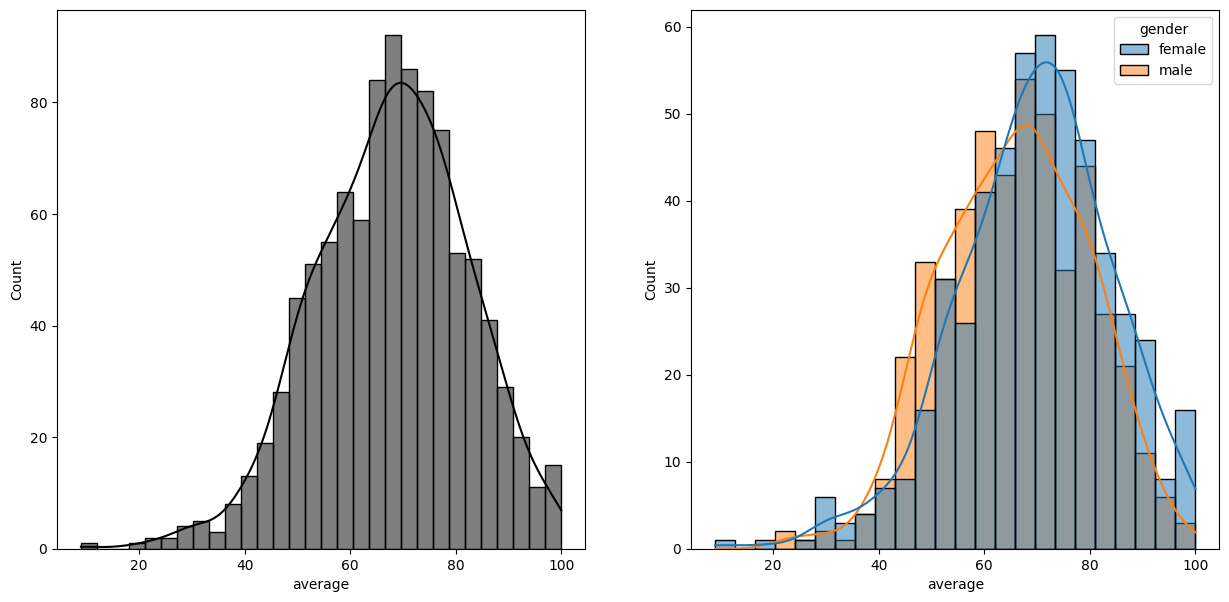

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='black')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

here the females are dominate the male's when you compare total score

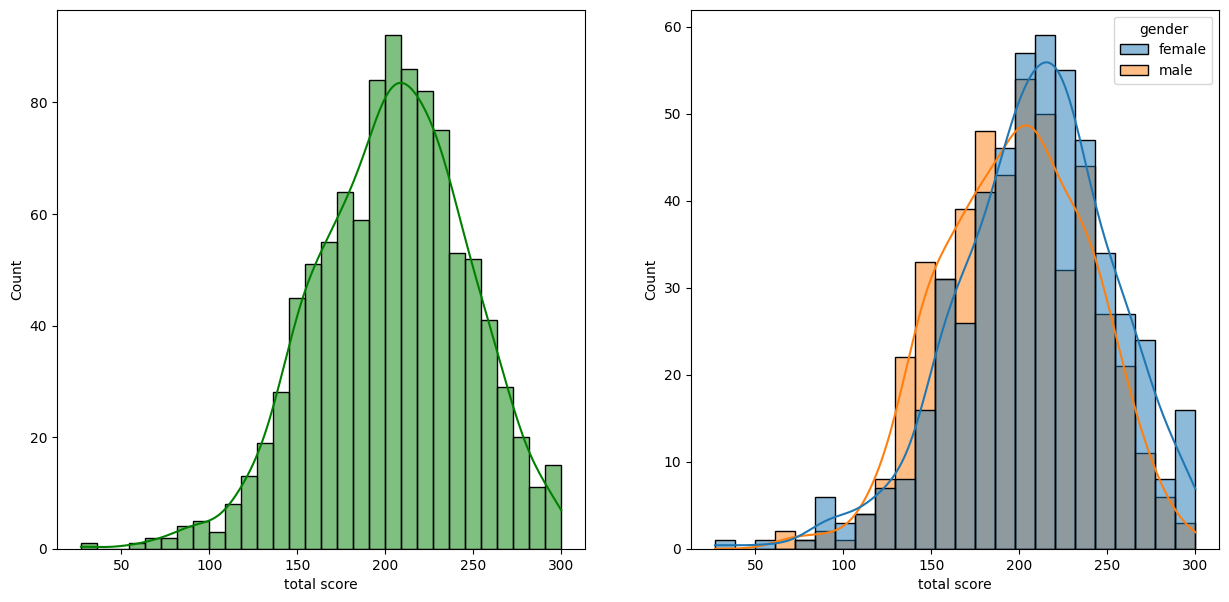

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

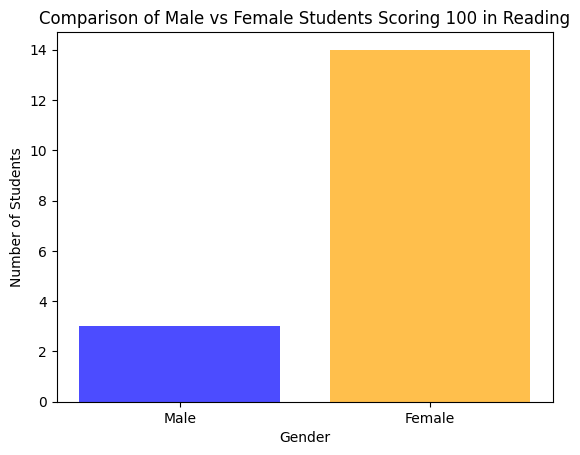

In [24]:
# Plotting comparison to show counts of male vs female students who scored 100 in reading
plt.figure()
counts = [reading_full_male, reading_full_female]
labels = ['Male', 'Female']
plt.bar(labels, counts, color=['blue', 'orange'], alpha=0.7)

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.title("Comparison of Male vs Female Students Scoring 100 in Reading")
plt.show()
